In [1]:
# Use seaborn for pairplot
from __future__ import absolute_import, division, print_function
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
#dataset_path

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
na_values = "?", comment='\t',
sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
print(" Initial data ")
print(dataset.tail())

# data cleanup process
dataset.isna().sum()
dataset = dataset.dropna()

# data changes
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
print("After Origin changes ")
print(dataset.tail())

train_dataset = dataset.sample(frac=0.8, random_state=0)

test_dataset = dataset.drop(train_dataset.index)

1.13.0-rc1
 Initial data 
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
393          82       1  
394          82       2  
395          82       1  
396          82       1  
397          82       1  
After Origin changes 
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
146  28.0          4          90.0        75.0  2125.0          14.5   
282  22.3          4         140.0        88.0  2890.0          17.3   
69   12.0          8         350.0       160.0  4456.0          13.5   
378  38.0          4         105.0        63.0  2125.0          14.7   
331  33.8          4          97.0        67.0  2145.0          18.0   
257  19.4          6         232.0        90.0  3210.0          17.2   
310  38.1          4          89.0        60.0  1968.0          18.8   
328  30.0          4         146.0        67.0  3250.0          21.8   
125  20.0          6         198.0        95.0  3102.0          16.5   
108  20.0          4          97.0        88.0  2279.0          19.0   
55   27.0          4          97.0        60.0  1834.0          19.0   
212  16.5          8         350.0       180.0  4380.0          12.1   
234  24.5          4         151.0        88.0  2740.0          

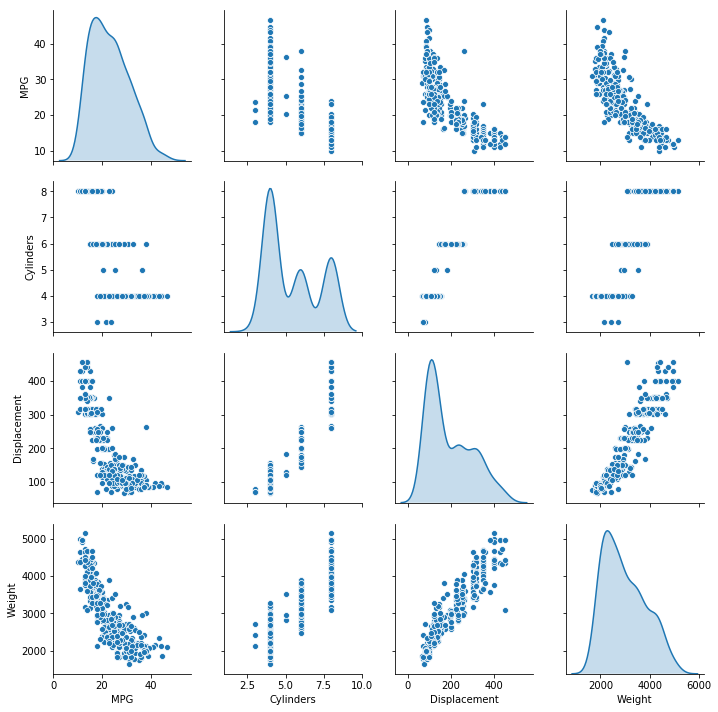

In [6]:
print(train_dataset)
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [5]:
from keras.layers import  Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np
import cbor as cb
import seaborn as sns

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
dataset = np.loadtxt("C:/Santhosh/AIML/data/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
x = dataset[:,0:8]
y = dataset[:,8]

model = Sequential()
model.add(Dense(10, kernel_initializer='uniform', input_dim=8, name='input', activation='relu'))
model.add(Dense(200, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x,y, validation_split=0.33, epochs=150,batch_size=10, verbose=0)

print(hist.history.keys())
# 
#Plot - Accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy - Test vs Train')
plt.legend(['train','val'])
plt.show()
#plot - Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss - Train vs Test')
plt.legend(['Train', 'Test'])
plt.show()


sns.pairplot(x, diag_kind="kde")

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>